# 1. Import libraries

In [837]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Dataset preparation

In [838]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


In [839]:
data[data['ID'] != data.index + 1]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [840]:
data.set_index('ID', inplace = True)

data['CCAvg'] = data['CCAvg'].str.replace('/', '.')
data['CCAvg'] = data['CCAvg'].astype(float)

df = pd.DataFrame(data)
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0


## 2-1. Checking the missing value error

In [841]:
df.describe(include = 'all')

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [842]:
###   There are no missing values in this dataset.
#####   Type 1 error = Missing value     DONE!   #####

## 2-2. Draw diagrams

### 2-2-1. Feature: ID

In [843]:
### This feature is not used in modeling.

### 2-2-2. Feature: Age

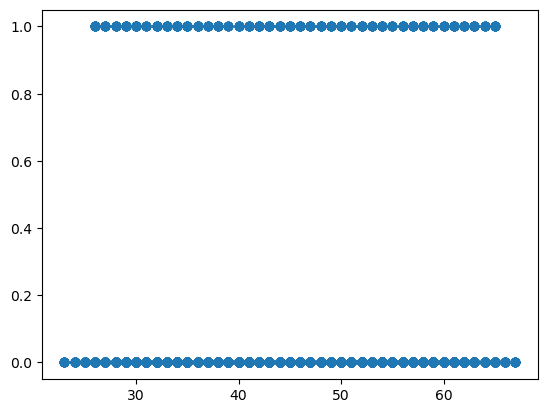

In [844]:
plt.scatter(df['Age'], df['Personal Loan'])

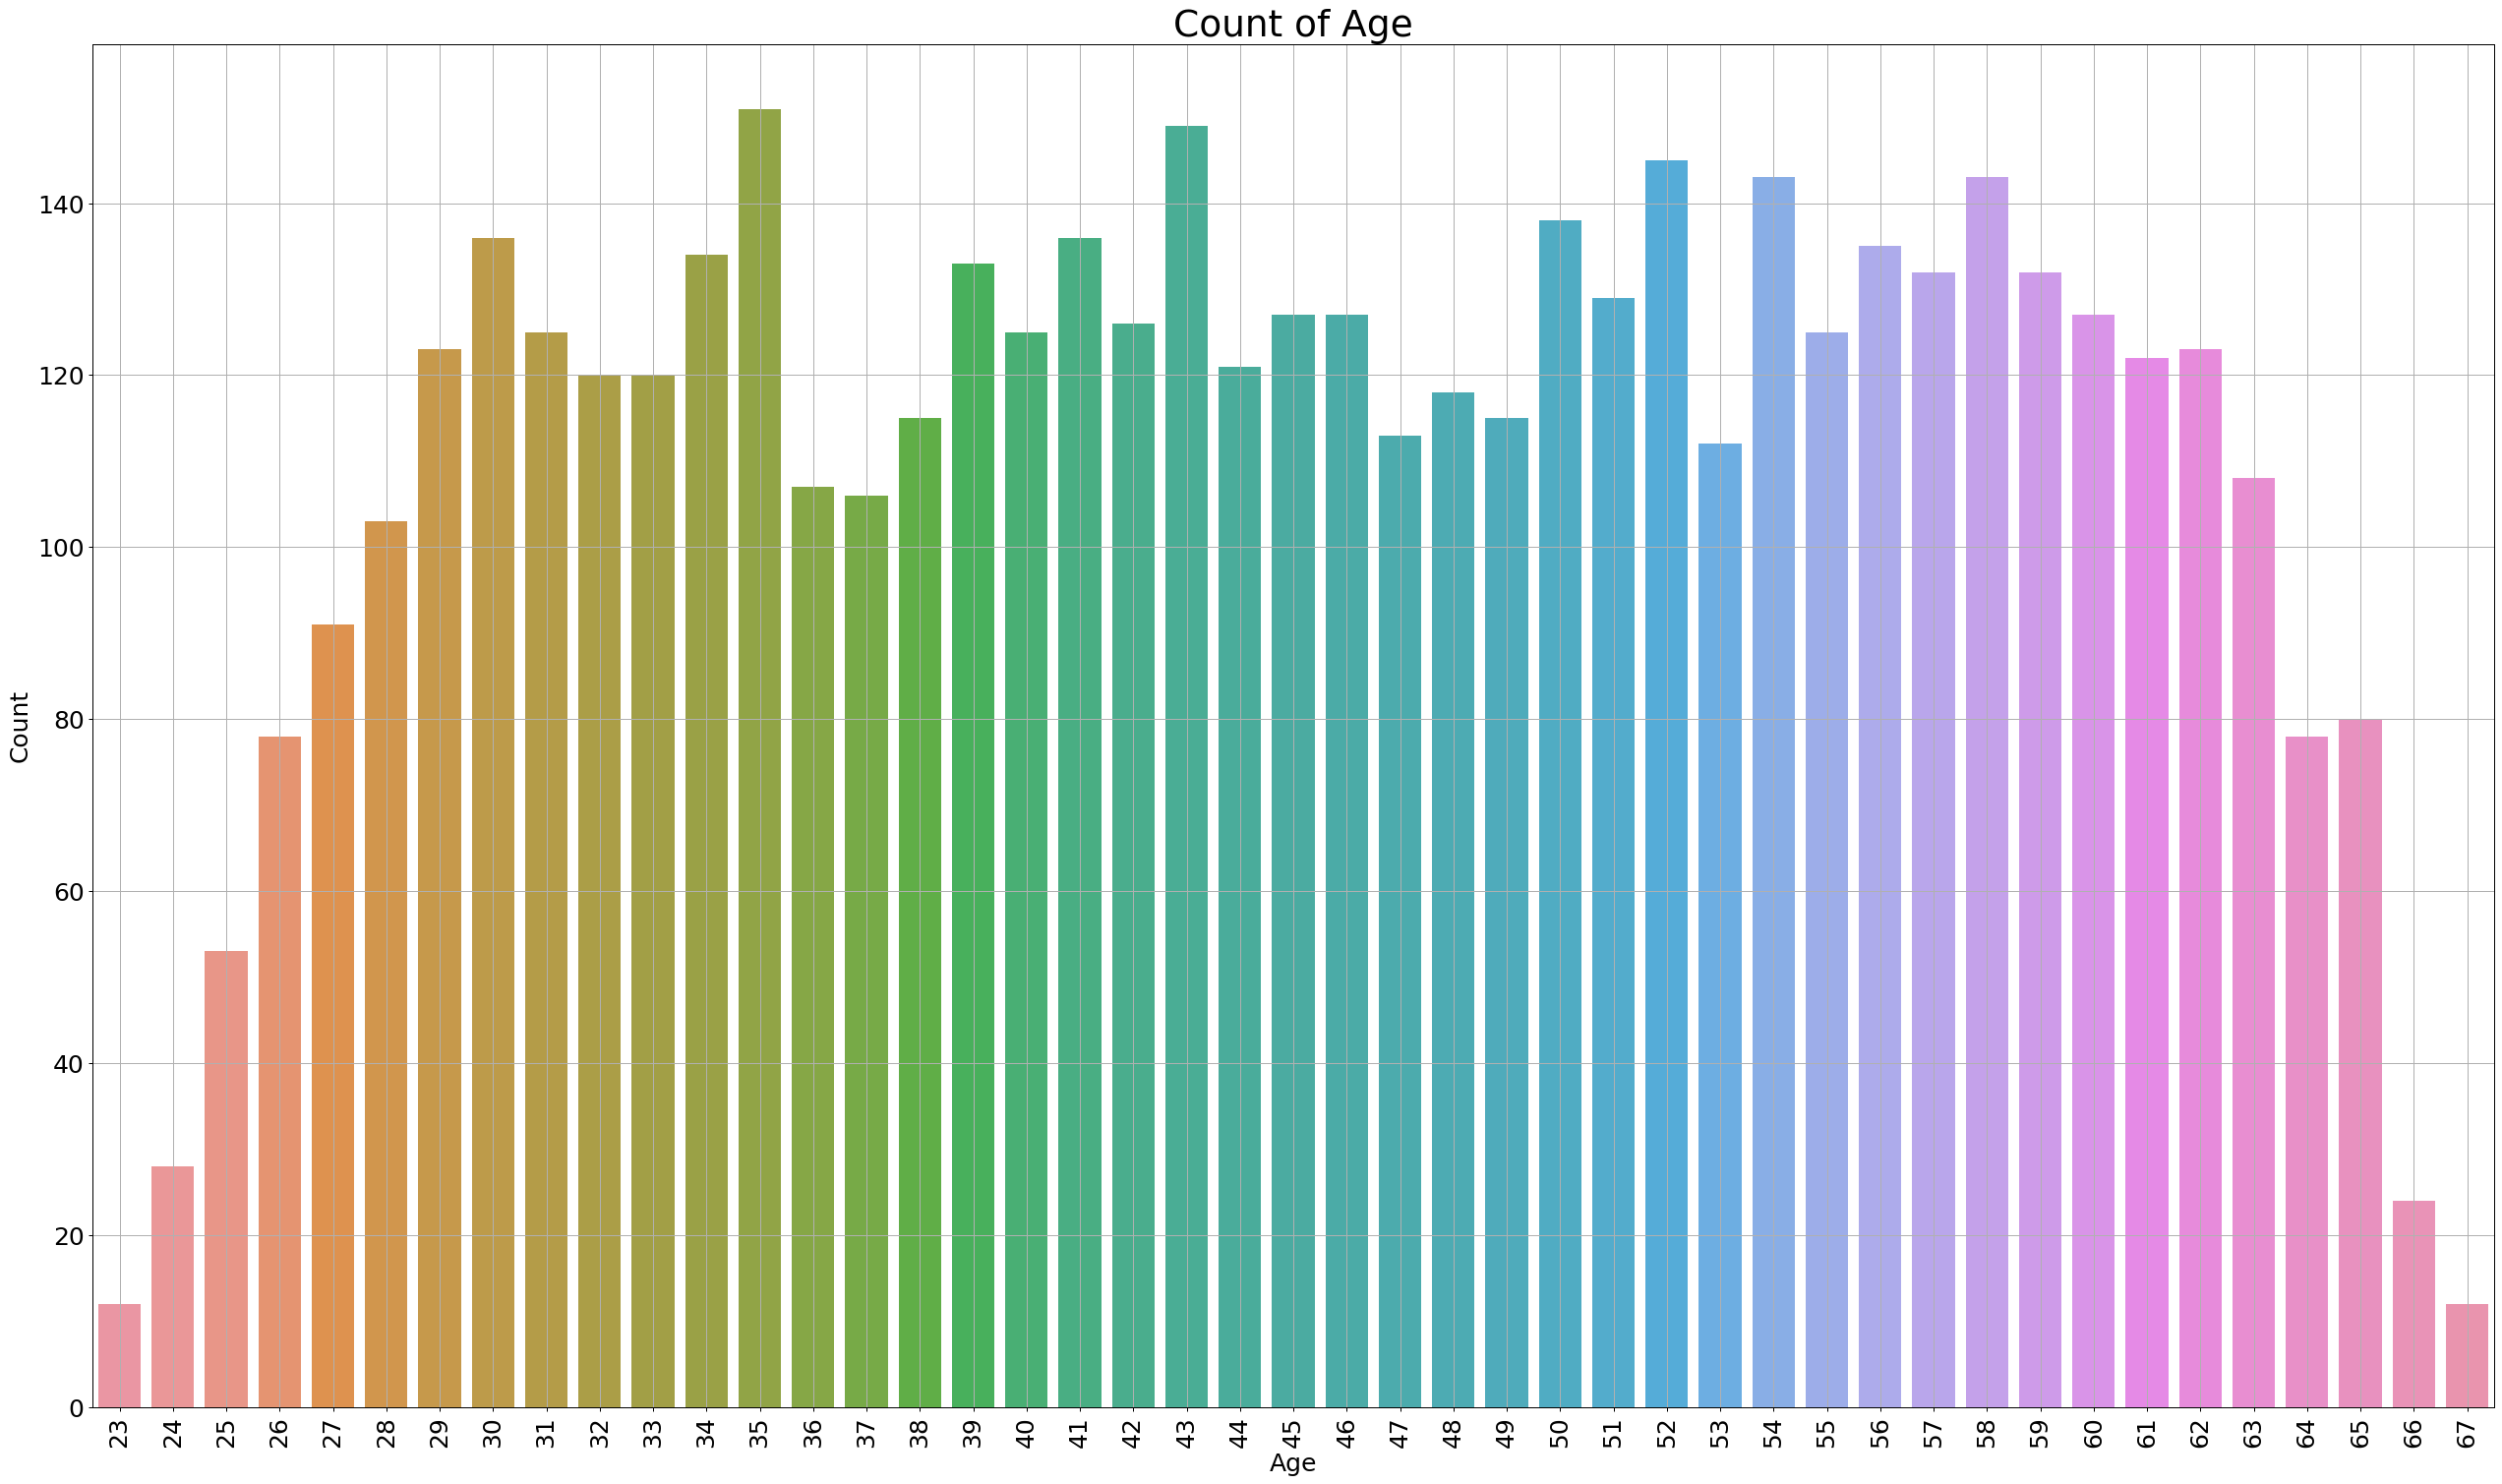

In [845]:
plt.figure (figsize=(35,20), dpi=90)
ax = sns.countplot (x="Age", data=df)
plt.xticks (rotation=90, fontsize=20)
plt.yticks (fontsize=20)
plt.xlabel("Age", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title ("Count of Age", fontsize=30)
plt.grid()

### 2-2-3. Feature: Experience

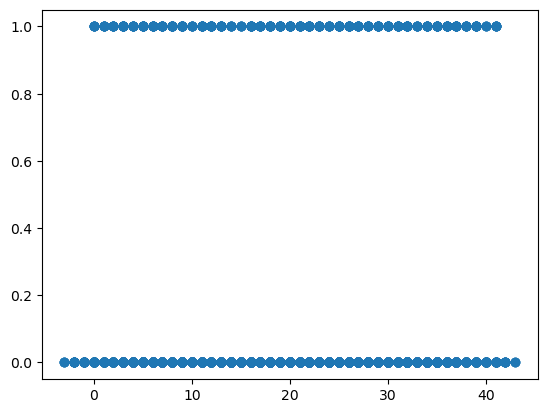

In [846]:
plt.scatter(df['Experience'], df['Personal Loan'])

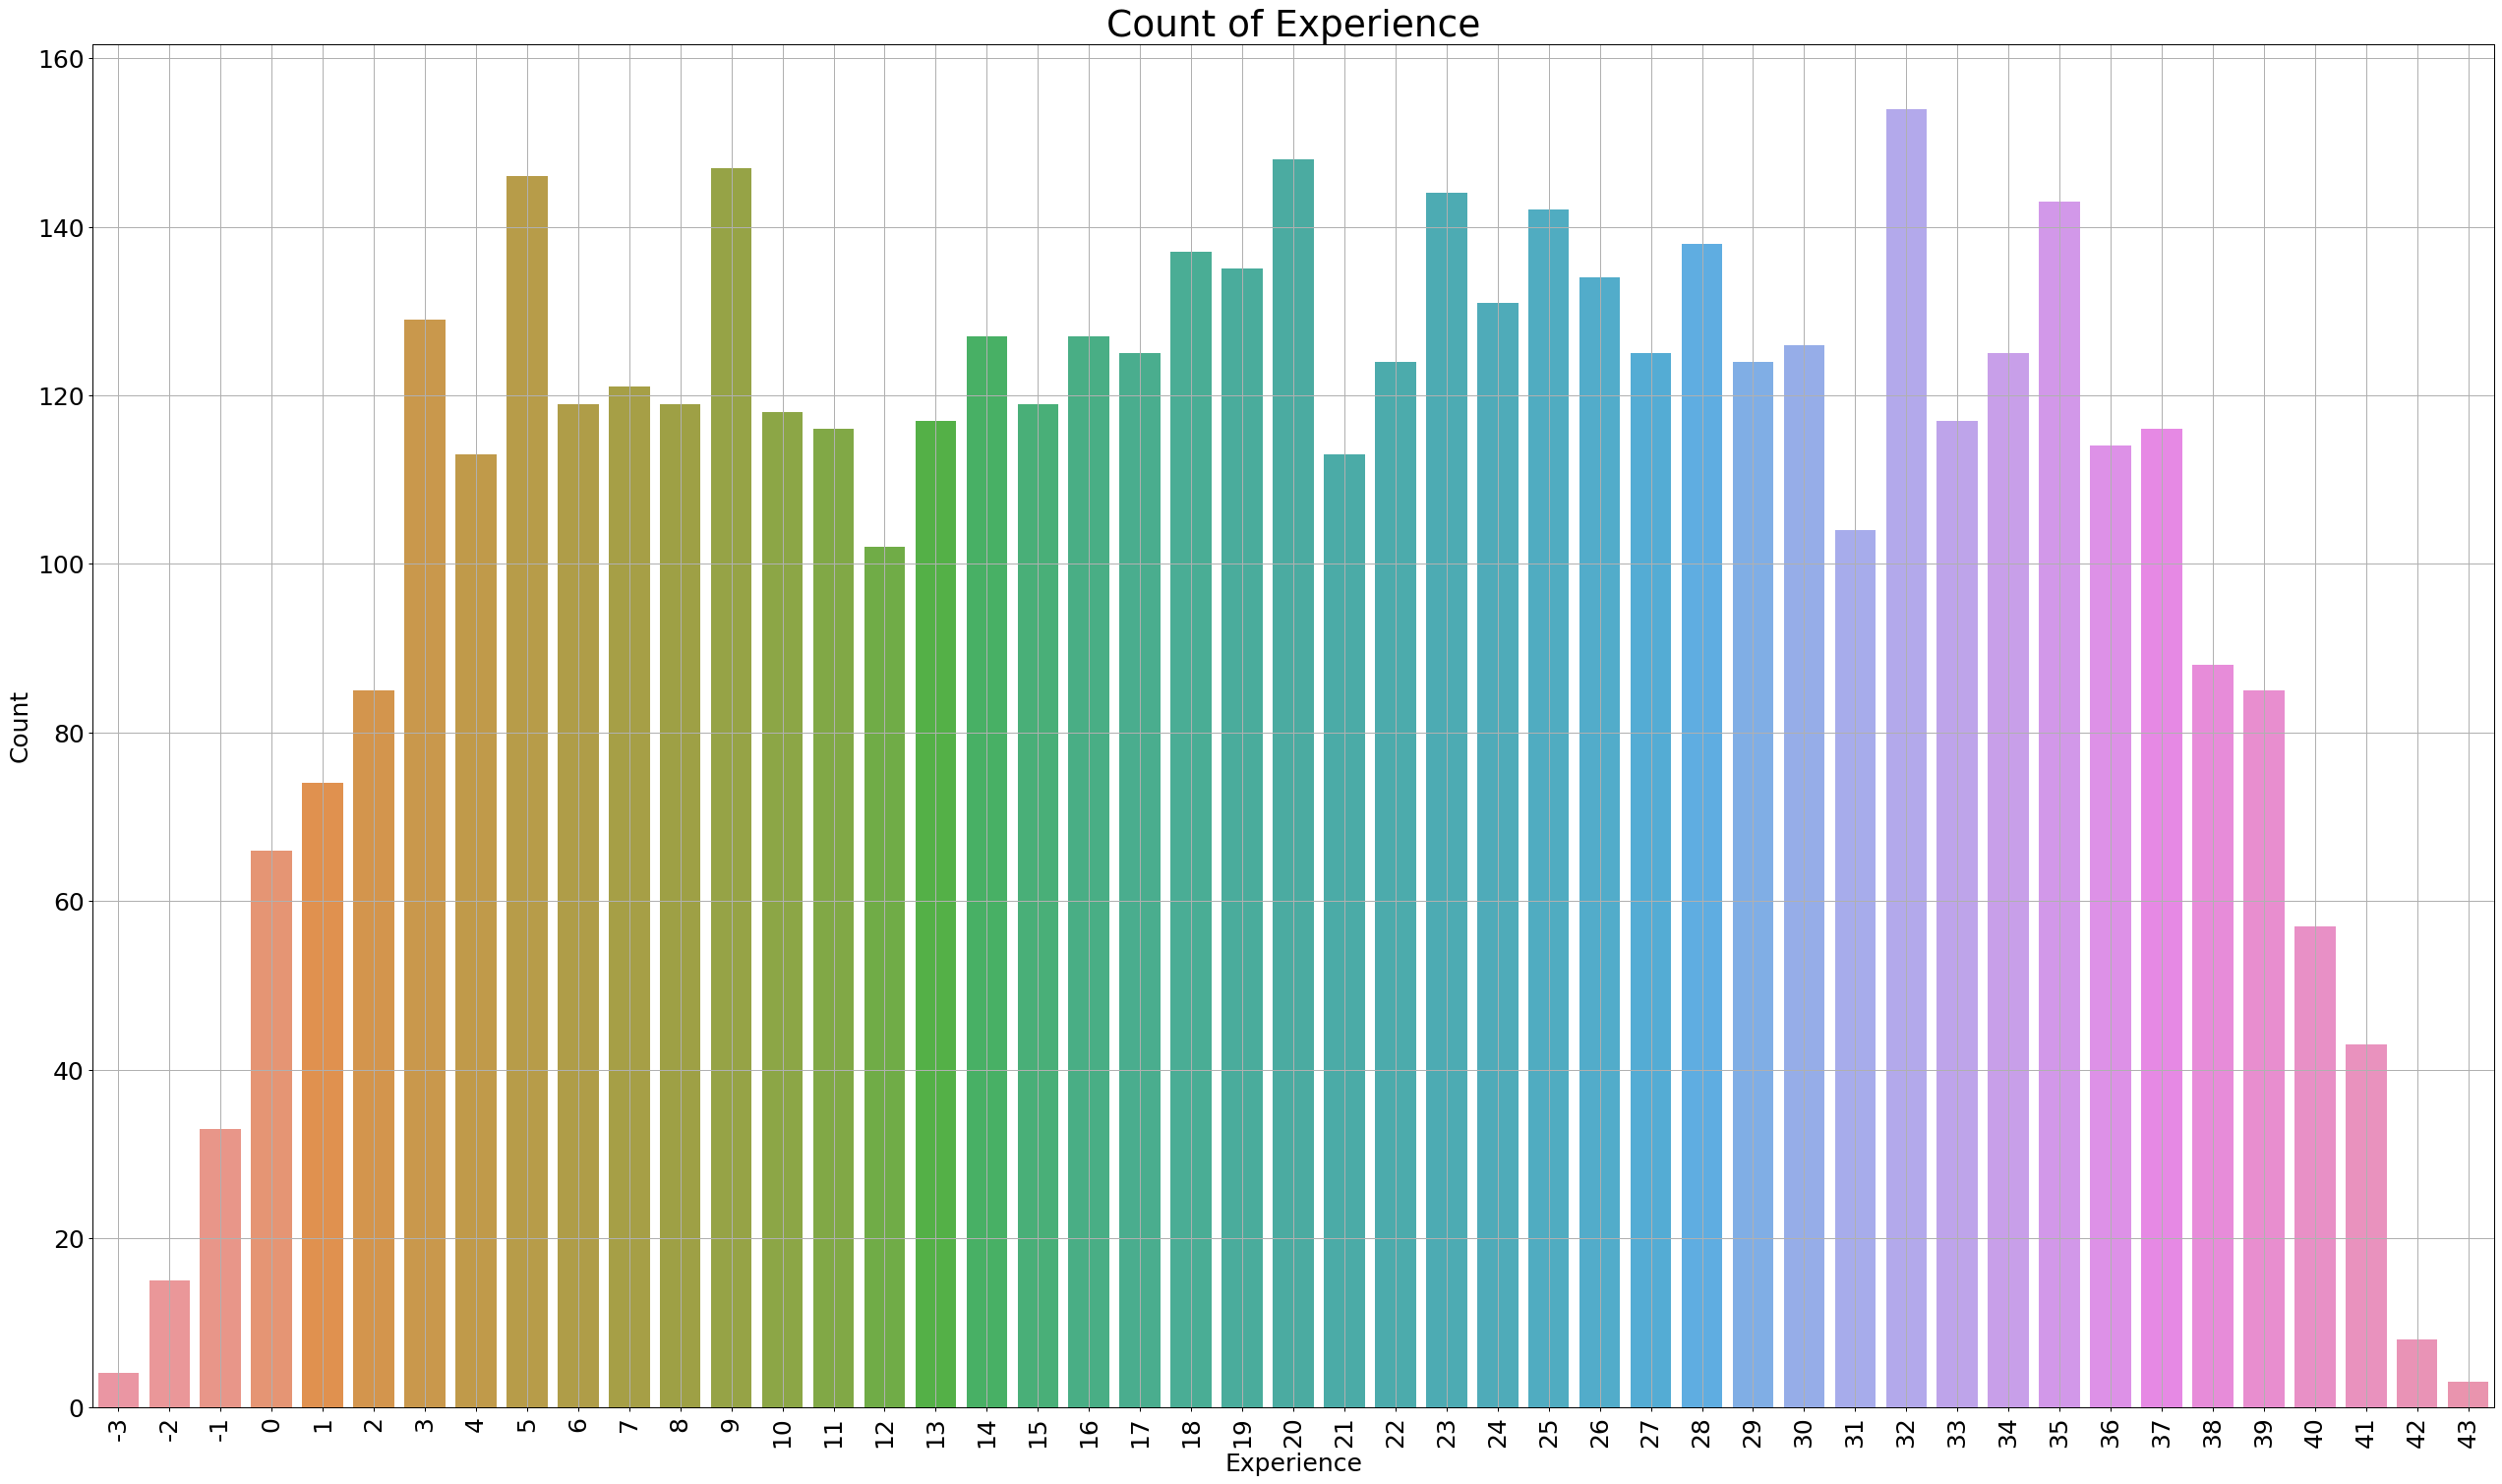

In [847]:
plt.figure (figsize=(35,20), dpi=90)
ax = sns.countplot (x="Experience", data=df)
plt.xticks (rotation=90, fontsize=20)
plt.yticks (fontsize=20)
plt.xlabel("Experience", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title ("Count of Experience", fontsize=30)
plt.grid()

### 2-2-4. Feature: Income

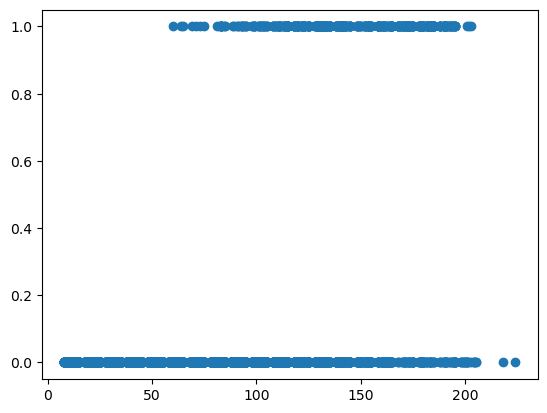

In [848]:
plt.scatter(df['Income'], df['Personal Loan'])

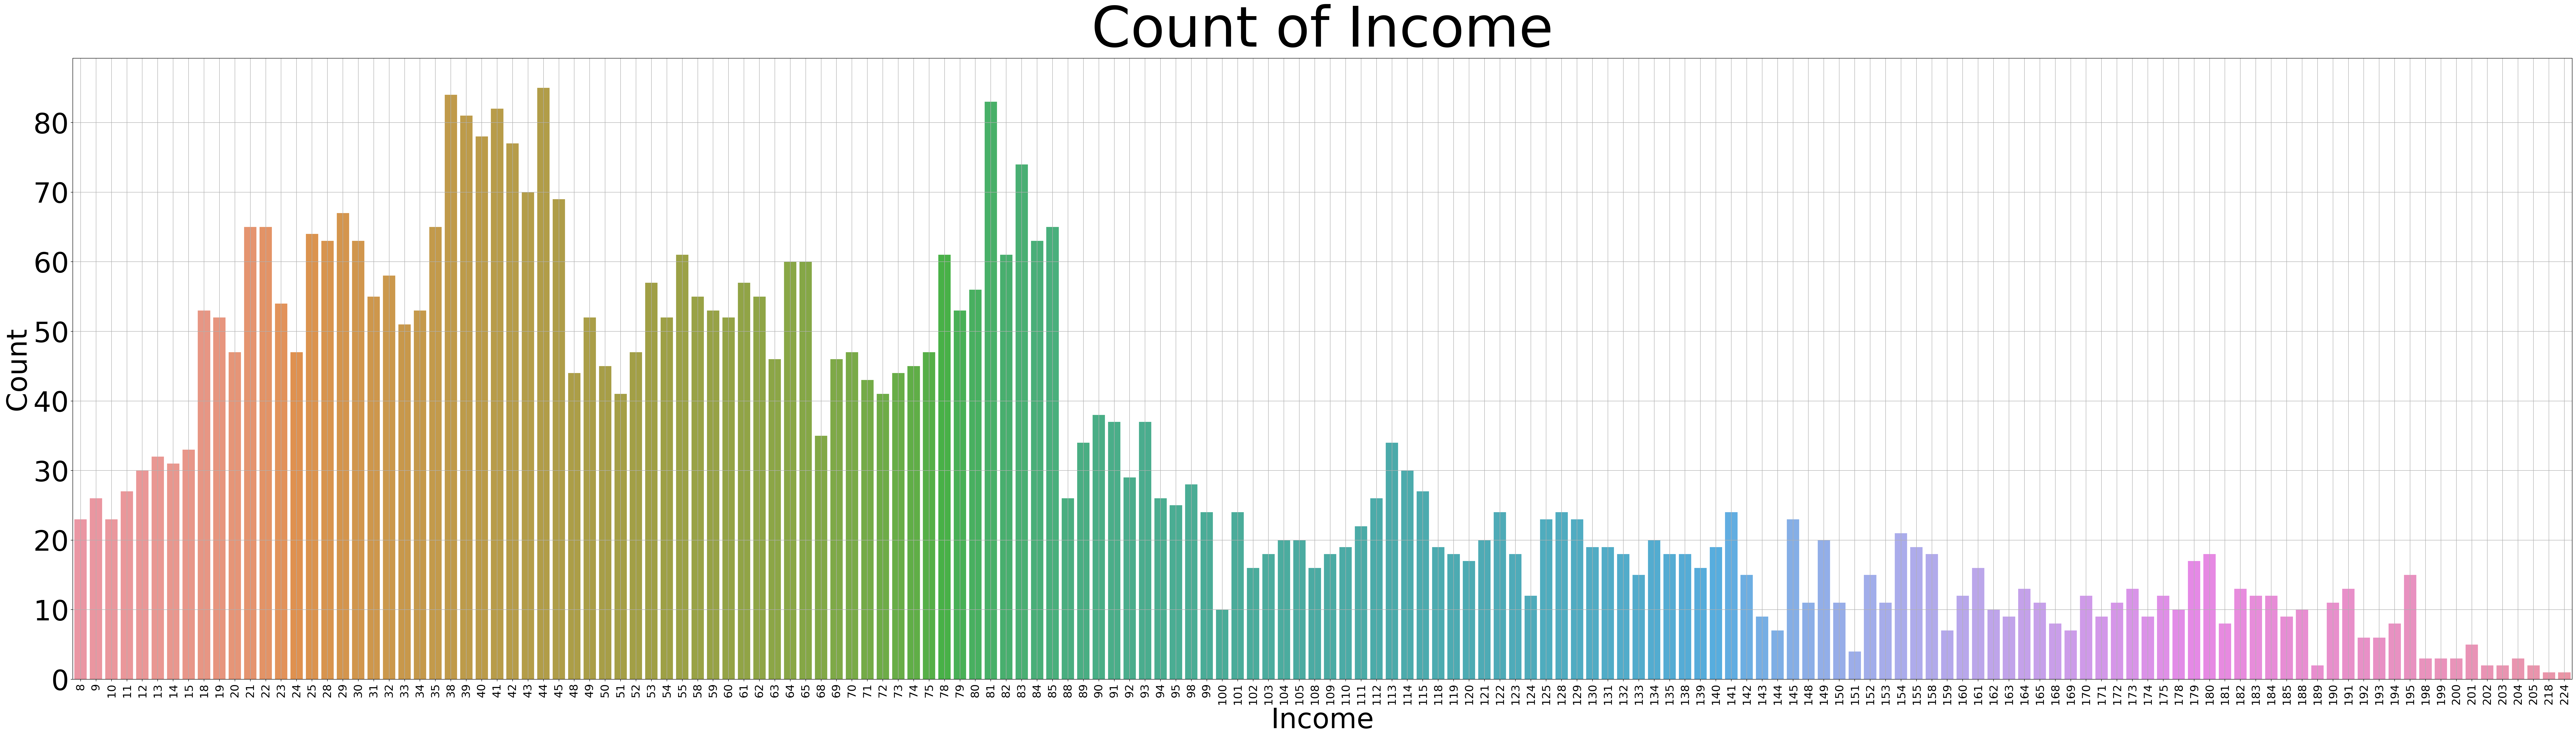

In [849]:
plt.figure (figsize=(80,20), dpi=180)
ax = sns.countplot (x="Income", data=df)
plt.xticks (rotation=90, fontsize=20)
plt.yticks (fontsize=50)
plt.xlabel("Income", fontsize=50)
plt.ylabel("Count", fontsize=50)
plt.title ("Count of Income", fontsize=100)
plt.grid()

### 2-2-5. Feature: ZIP Code

In [850]:
### This feature is not used in modeling.

### 2-2-6. Feature: Family

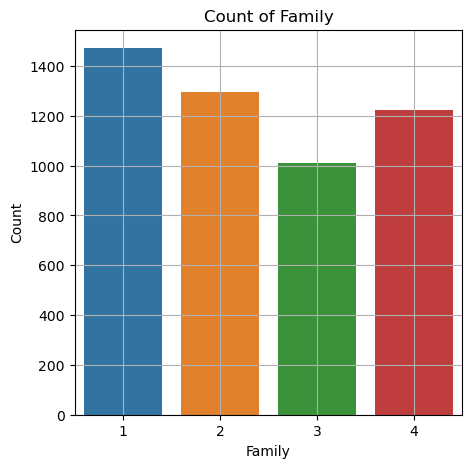

In [851]:
plt.figure (figsize=(5,5))
ax = sns.countplot (x="Family", data=df)
plt.xlabel("Family")
plt.ylabel("Count")
plt.title ("Count of Family")
plt.grid()

### 2-2-7. Feature: CCAvg

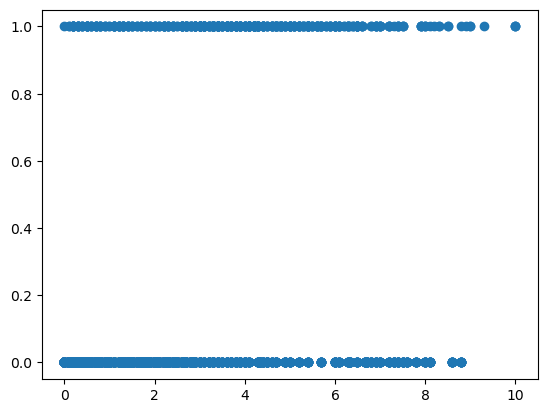

In [852]:
plt.scatter(df['CCAvg'], df['Personal Loan'])

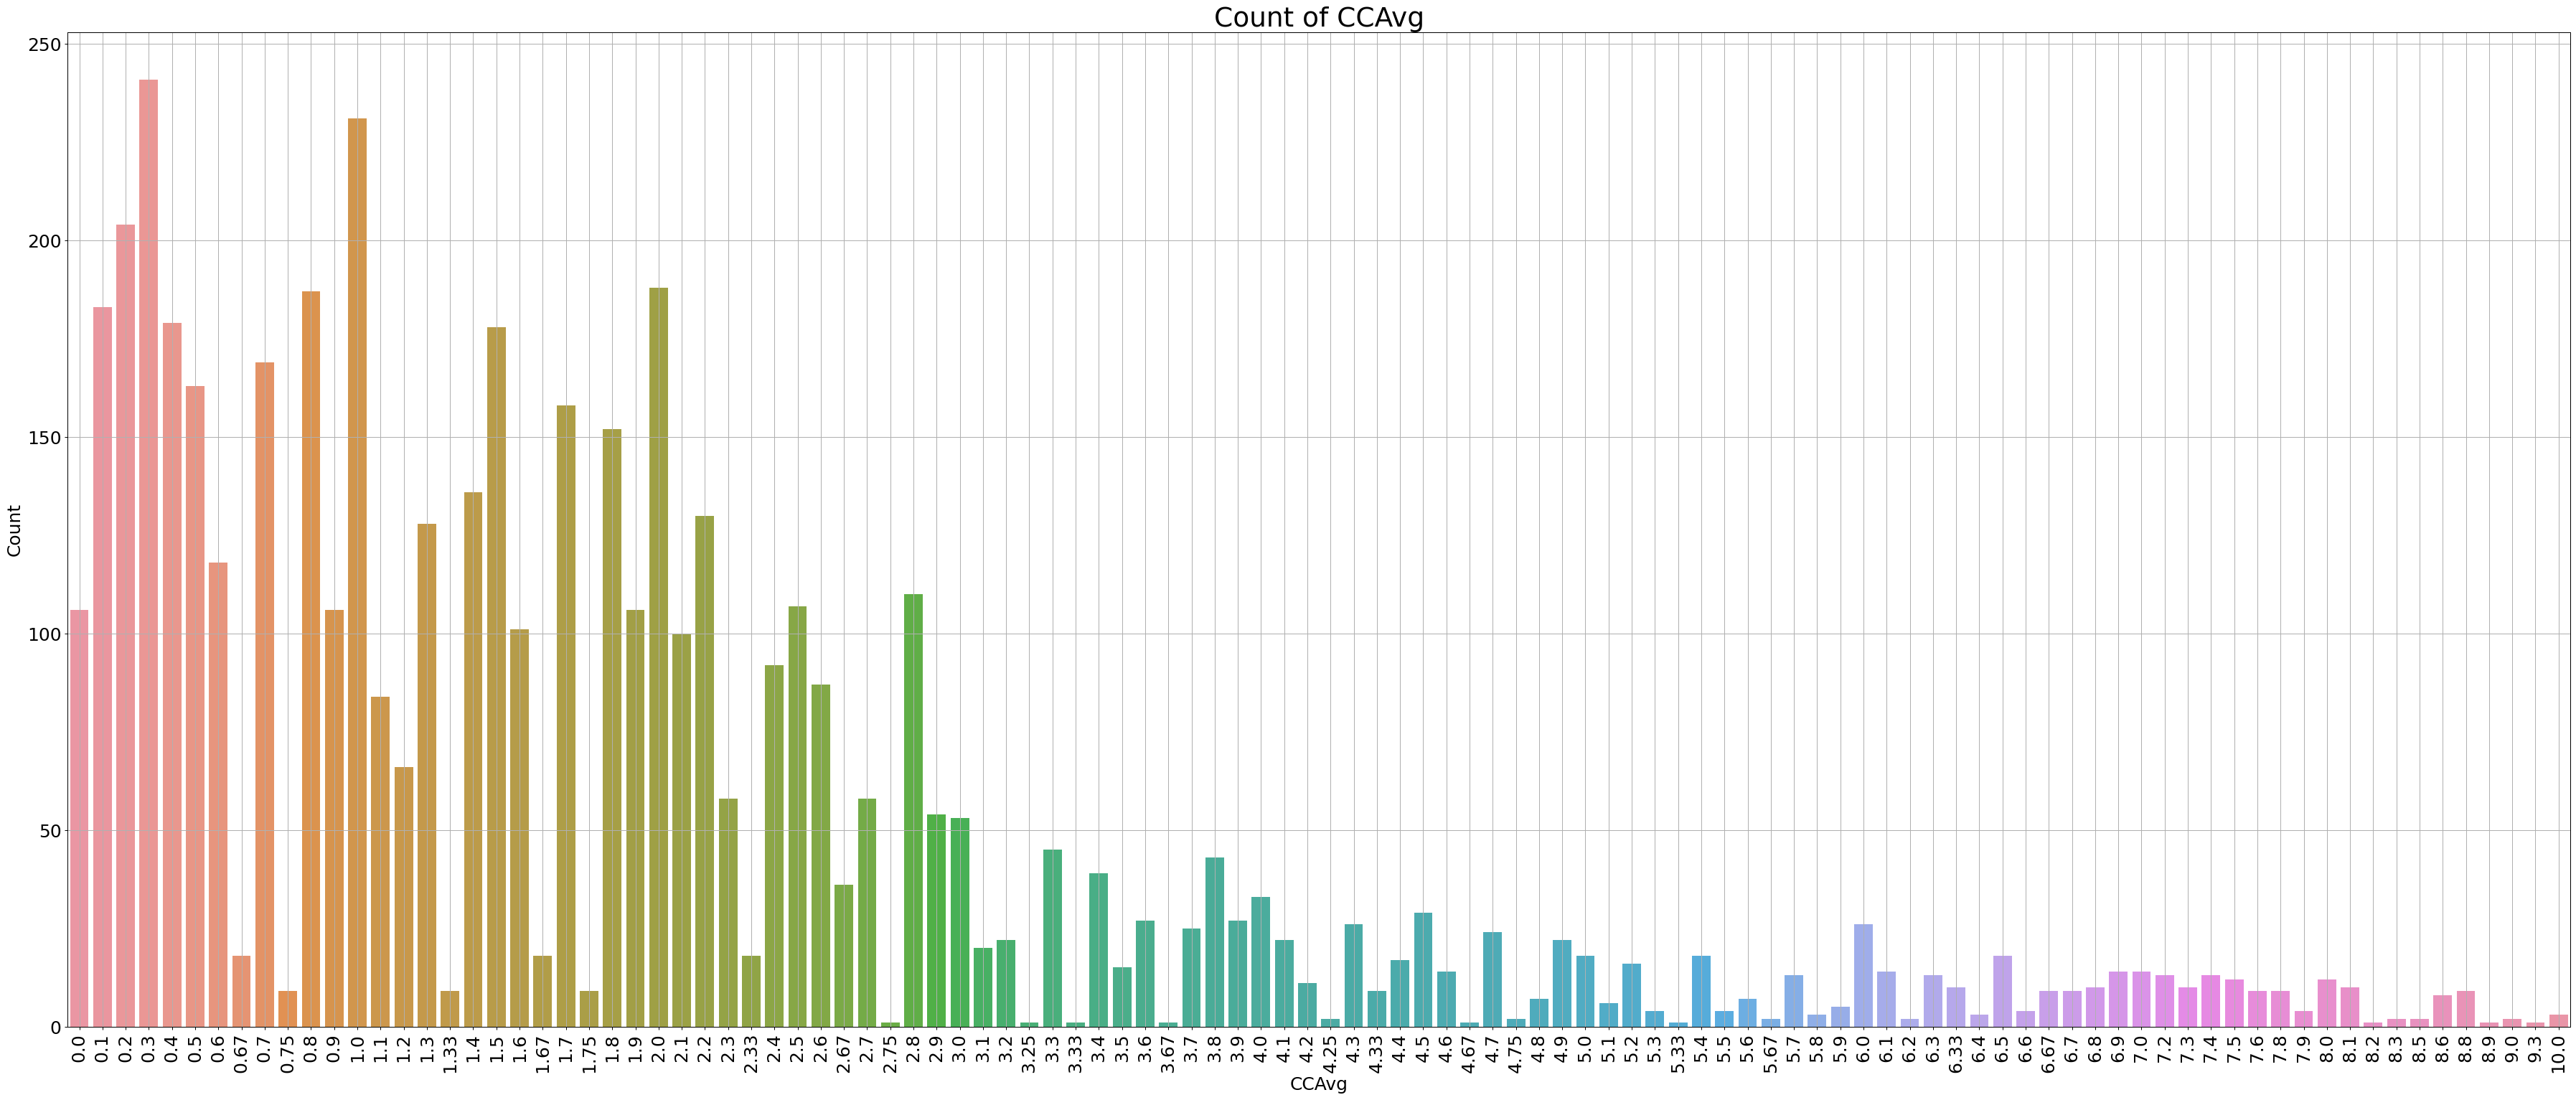

In [853]:
plt.figure (figsize=(50,20), dpi=90)
ax = sns.countplot (x="CCAvg", data=df)
plt.xticks (rotation=90, fontsize=20)
plt.yticks (fontsize=20)
plt.xlabel("CCAvg", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title ("Count of CCAvg", fontsize=30)
plt.grid()

### 2-2-8. Feature: Education

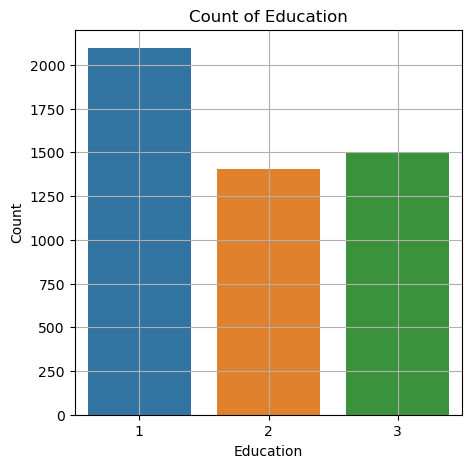

In [854]:
plt.figure (figsize=(5,5))
ax = sns.countplot (x="Education", data=df)
plt.xlabel("Education")
plt.ylabel("Count")
plt.title ("Count of Education")
plt.grid()

### 2-2-9. Feature: Mortgage

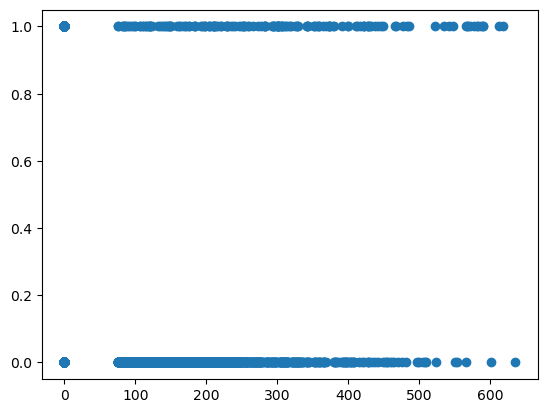

In [855]:
plt.scatter(df['Mortgage'], df['Personal Loan'])

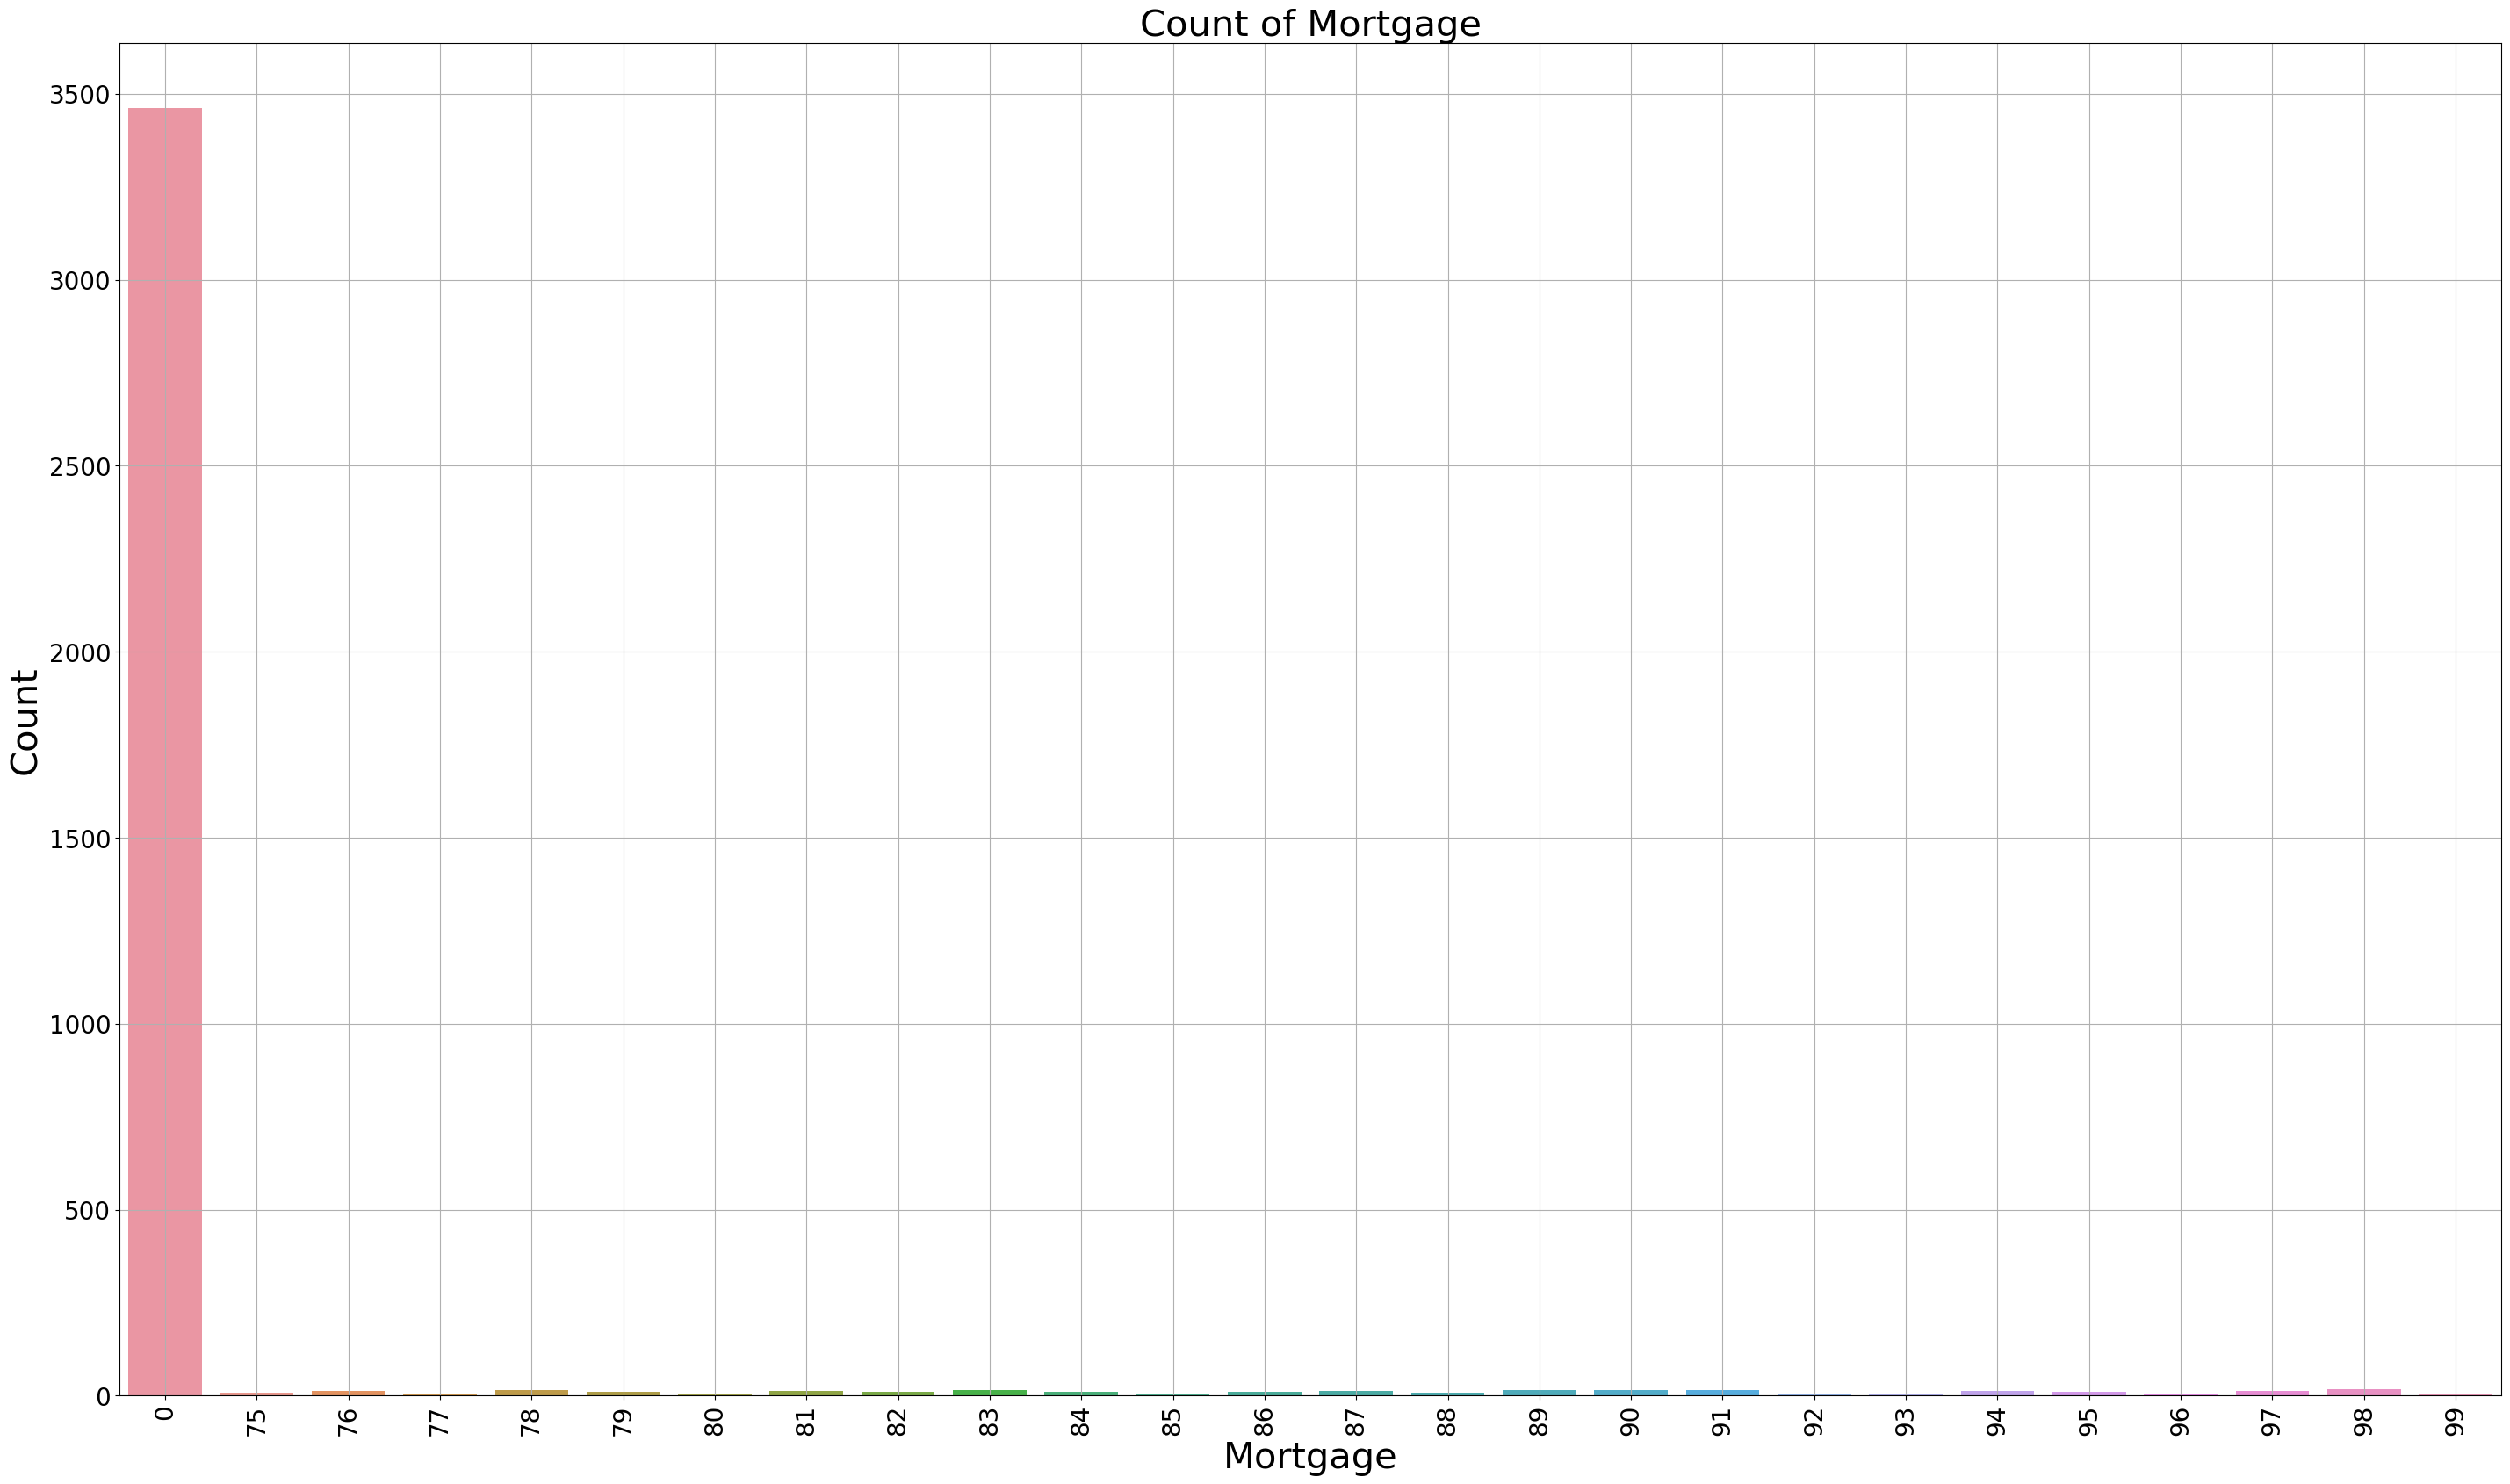

In [856]:
plt.figure (figsize=(35,20))
ax = sns.countplot (x="Mortgage", data=df[df['Mortgage'] < 100])
plt.xticks (rotation=90, fontsize=20)
plt.yticks (fontsize=20,)
plt.xlabel("Mortgage", fontsize=30)
plt.ylabel("Count", fontsize=30)
plt.title ("Count of Mortgage", fontsize=30)
plt.grid()

### 2-2-10. Feature: Securities Account

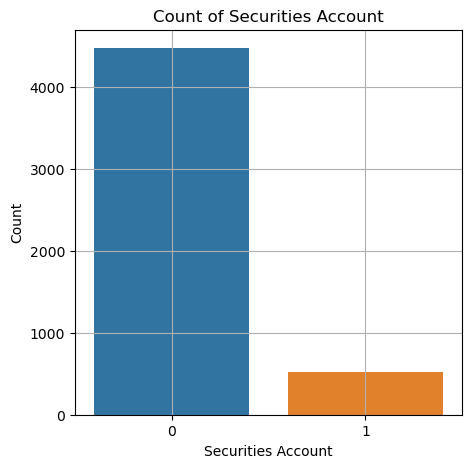

In [857]:
plt.figure (figsize=(5,5))
ax = sns.countplot (x="Securities Account", data=df)
plt.xlabel("Securities Account")
plt.ylabel("Count")
plt.title ("Count of Securities Account")
plt.grid()

### 2-2-11. Feature: CD Account

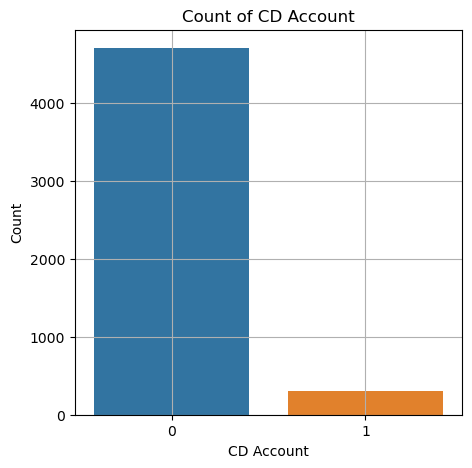

In [858]:
plt.figure (figsize=(5,5))
ax = sns.countplot (x="CD Account", data=df)
plt.xlabel("CD Account")
plt.ylabel("Count")
plt.title ("Count of CD Account")
plt.grid()

### 2-2-12. Feature: Online

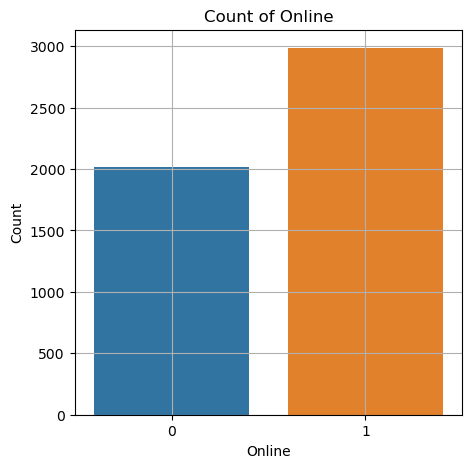

In [859]:
plt.figure (figsize=(5,5))
ax = sns.countplot (x="Online", data=df)
plt.xlabel("Online")
plt.ylabel("Count")
plt.title ("Count of Online")
plt.grid()

### 2-2-13. Feature: CreditCard

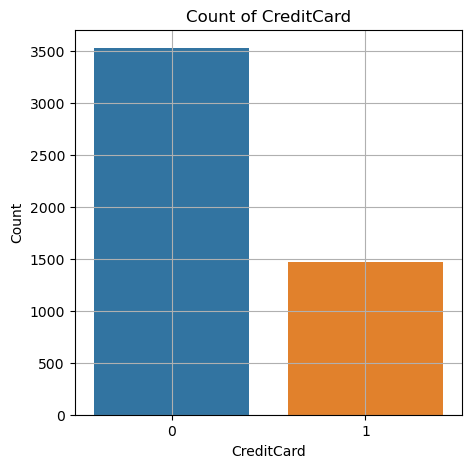

In [860]:
plt.figure (figsize=(5,5))
ax = sns.countplot (x="CreditCard", data=df)
plt.xlabel("CreditCard")
plt.ylabel("Count")
plt.title ("Count of CreditCard")
plt.grid()

### 2-2-14. Target: Personal Loan

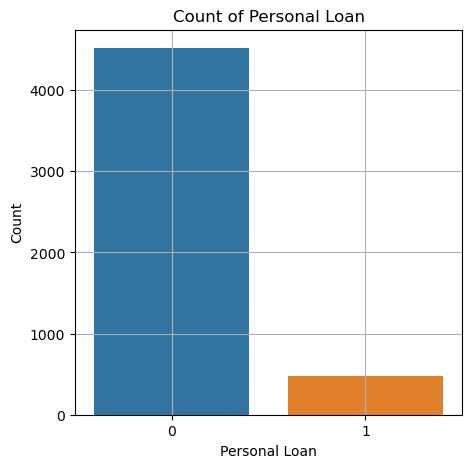

In [861]:
plt.figure (figsize=(5,5))
ax = sns.countplot (x="Personal Loan", data=df)
plt.xlabel("Personal Loan")
plt.ylabel("Count")
plt.title ("Count of Personal Loan")
plt.grid()

## 2-3. Eliminating noise error

In [862]:
df['Experience'] = abs(df['Experience'])

In [863]:
#####   Type 2 error = Noise     DONE!   #####

# 3. Selection of features 

In [864]:
x = pd.DataFrame(df, columns=['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard'])
y = df['Personal Loan'].values.reshape(-1,1)

In [865]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 0)

# 4. Modeling with logistic regression

In [866]:
from sklearn.linear_model import LogisticRegression

In [867]:
lg_model = LogisticRegression(max_iter = 1000)

In [868]:
lg_model.fit(x_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [869]:
y_pred = lg_model.predict(x_test)
print('confusion matrix: \n', confusion_matrix(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))

confusion matrix: 
 [[902   8]
 [ 33  57]] 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       910
           1       0.88      0.63      0.74        90

    accuracy                           0.96      1000
   macro avg       0.92      0.81      0.86      1000
weighted avg       0.96      0.96      0.96      1000



# 5. Modeling with naive bayes

In [870]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB

In [871]:
gany_model = GaussianNB().    fit(x_train, y_train)
muny_model = MultinomialNB(). fit(x_train, y_train)
cony_model = ComplementNB().  fit(x_train, y_train)
beny_model = BernoulliNB().   fit(x_train, y_train)
cany_model = CategoricalNB(). fit(x_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [872]:
y_pred = gany_model.predict(x_test)
print('confusion matrix: \n', confusion_matrix(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))

confusion matrix: 
 [[837  73]
 [ 35  55]] 

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       910
           1       0.43      0.61      0.50        90

    accuracy                           0.89      1000
   macro avg       0.69      0.77      0.72      1000
weighted avg       0.91      0.89      0.90      1000



In [873]:
y_pred = muny_model.predict(x_test)
print('confusion matrix: \n', confusion_matrix(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))

confusion matrix: 
 [[696 214]
 [ 33  57]] 

              precision    recall  f1-score   support

           0       0.95      0.76      0.85       910
           1       0.21      0.63      0.32        90

    accuracy                           0.75      1000
   macro avg       0.58      0.70      0.58      1000
weighted avg       0.89      0.75      0.80      1000



In [874]:
y_pred = cony_model.predict(x_test)
print('confusion matrix: \n', confusion_matrix(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))

confusion matrix: 
 [[678 232]
 [ 29  61]] 

              precision    recall  f1-score   support

           0       0.96      0.75      0.84       910
           1       0.21      0.68      0.32        90

    accuracy                           0.74      1000
   macro avg       0.58      0.71      0.58      1000
weighted avg       0.89      0.74      0.79      1000



In [875]:
y_pred = beny_model.predict(x_test)
print('confusion matrix: \n', confusion_matrix(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))

confusion matrix: 
 [[902   8]
 [ 88   2]] 

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       910
           1       0.20      0.02      0.04        90

    accuracy                           0.90      1000
   macro avg       0.56      0.51      0.49      1000
weighted avg       0.85      0.90      0.87      1000



In [876]:
y_pred = cany_model.predict(x_test)
print('confusion matrix: \n', confusion_matrix(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))

confusion matrix: 
 [[896  14]
 [ 45  45]] 

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       910
           1       0.76      0.50      0.60        90

    accuracy                           0.94      1000
   macro avg       0.86      0.74      0.79      1000
weighted avg       0.94      0.94      0.94      1000



# 6. Modeling with KNN

In [877]:
from sklearn.neighbors import KNeighborsClassifier

In [878]:
k = 20
acc = []

for i in range(1,k+1):
    K = 10
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(x_train, y_train.ravel())
    y_pred = knn_model.predict(x_test)
    acc.append((f'k = {i:2}', metrics.accuracy_score(y_test, y_pred)))
    
acc

[('k =  1', 0.907),
 ('k =  2', 0.917),
 ('k =  3', 0.918),
 ('k =  4', 0.924),
 ('k =  5', 0.917),
 ('k =  6', 0.921),
 ('k =  7', 0.921),
 ('k =  8', 0.921),
 ('k =  9', 0.923),
 ('k = 10', 0.92),
 ('k = 11', 0.919),
 ('k = 12', 0.917),
 ('k = 13', 0.919),
 ('k = 14', 0.914),
 ('k = 15', 0.914),
 ('k = 16', 0.908),
 ('k = 17', 0.912),
 ('k = 18', 0.911),
 ('k = 19', 0.909),
 ('k = 20', 0.909)]

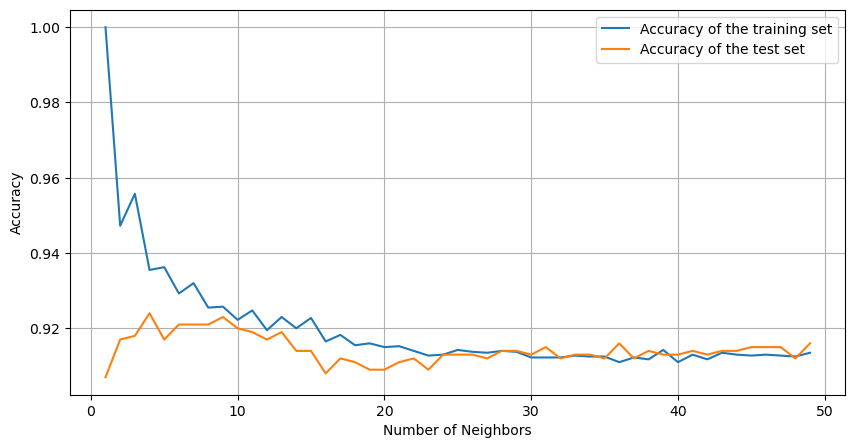

In [879]:
training_acc = []
test_acc = []

#try knn_model for diffrent k nearest neighbor from 1 to 15
neighbors_setting = range(1,50)

for n_neighbors in neighbors_setting:
    knn_model = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn_model.fit(x_train, y_train.ravel())
    training_acc.append(knn_model.score(x_train, y_train))
    test_acc.append(knn_model.score(x_test, y_test))

plt.figure(figsize =(10,5))
plt.plot(neighbors_setting, training_acc, label = 'Accuracy of the training set')
plt.plot(neighbors_setting, test_acc, label = 'Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.grid()
plt.legend()

In [880]:
from sklearn.model_selection import GridSearchCV

In [881]:
parameters = {"n_neighbors": range(1, 50)}
grid_knn = GridSearchCV(estimator = knn_model,
                        param_grid = parameters,
                        scoring = 'accuracy',
                        cv = 10,
                        verbose= 1,
                        n_jobs = -1)

grid_knn.fit(x_train, y_train.ravel())
grid_knn.best_estimator_

Fitting 10 folds for each of 49 candidates, totalling 490 fits


KNeighborsClassifier(n_neighbors=6)

In [882]:
knn_model = KNeighborsClassifier(n_neighbors = 2)

In [883]:
knn_model.fit(x_train, y_train.ravel())

KNeighborsClassifier(n_neighbors=2)

In [884]:
y_pred = knn_model.predict(x_test)
print('confusion matrix: \n', confusion_matrix(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))

confusion matrix: 
 [[894  16]
 [ 67  23]] 

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       910
           1       0.59      0.26      0.36        90

    accuracy                           0.92      1000
   macro avg       0.76      0.62      0.66      1000
weighted avg       0.90      0.92      0.90      1000



# 7. Conclusion

In [885]:
print('-'*20, 'Best model with logistic regression' , '-'*20, '\n')
y_pred = lg_model.predict(x_test)
print('confusion matrix: \n', confusion_matrix(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))

print('\n\n')
print('-'*20, 'Best model with naive bayes' , '-'*20, '\n')
y_pred = cany_model.predict(x_test)
print('confusion matrix: \n', confusion_matrix(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))

print('\n\n')
print('-'*20, 'Best model with KNN' , '-'*20, '\n')
y_pred = knn_model.predict(x_test)
print('confusion matrix: \n', confusion_matrix(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))

-------------------- Best model with logistic regression -------------------- 

confusion matrix: 
 [[902   8]
 [ 33  57]] 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       910
           1       0.88      0.63      0.74        90

    accuracy                           0.96      1000
   macro avg       0.92      0.81      0.86      1000
weighted avg       0.96      0.96      0.96      1000




-------------------- Best model with naive bayes -------------------- 

confusion matrix: 
 [[896  14]
 [ 45  45]] 

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       910
           1       0.76      0.50      0.60        90

    accuracy                           0.94      1000
   macro avg       0.86      0.74      0.79      1000
weighted avg       0.94      0.94      0.94      1000




-------------------- Best model with KNN -------------------- 

confusion matrix: 
 [[894  16]
 [ 

In [886]:
### Result: logistic regression is the best algorithm for this dataset.

# 8. Testing by taking input from the user

In [901]:
inputs = {'ID': 0, 'Age': 0, 'Experience': 0, 'Income': 0, 'ZIP Code': 0, 'Family': 0, 'CCAvg': 0, 'Education': 0, 'Mortgage': 0, 'Securities Account': 0, 'CD Account': 0, 'Online': 0, 'CreditCard': 0}

print('--------------- Help ---------------')
print('All inputs are numerical. So...')
print('\nFor Education input:')
print('1 = Undergrad')
print('2 = Graduate')
print('3 = Advanced/Professional')
print('\nFor CCAvg input:')
print('n.m = n/m')
print('------------------------------------', end = '\n'*3)

for input_name in inputs:
    print(f"Enter {input_name}: ", end = '')
    inputs[input_name] = float(input())

inputs.pop('ID')
inputs.pop('ZIP Code')
inputs = pd.DataFrame([list(inputs.values())])

result = lg_model.predict(inputs)

print(f'\nPersonal Loan => {result}')

--------------- Help ---------------
All inputs are numerical. So...

For Education input:
1 = Undergrad
2 = Graduate
3 = Advanced/Professional

For CCAvg input:
n.m = n/m
------------------------------------


Enter ID: 5071
Enter Age: 42
Enter Experience: 16
Enter Income: 30
Enter ZIP Code: 92037
Enter Family: 3
Enter CCAvg: 1.2
Enter Education: 3
Enter Mortgage: 0
Enter Securities Account: 1
Enter CD Account: 0
Enter Online: 1
Enter CreditCard: 1

Personal Loan => [0]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
